# Inference test
For the data in file `training_data.jsonl` we want to test the inference of many LLM models.

## Data
The data is stored in `training_data.jsonl` file.
It has the following format:
```json
 {
   "messages": [
     {
       "role": "system",
       "content": "You are an expert in the field of genetics..."
     },
     {
       "role": "user", 
       "content": "Find and list all genomic variants..."
     }
   ],
   "metadata": {
     "variant_name": "N1303K",
     "rsid": "rs80034486", 
     "identifier": 34852971,
     "found": true
   }
 }

```


## Inference for LLama 3.1

- on Together AI
- Endpoint name: meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo-128K

In [2]:
# set the TOGETHER_API_KEY environment variable
import os
os.environ["TOGETHER_API_KEY"] = "tgp_v1_0yAff3w9AUQ773bxnbxCGpDRy-Jwd0uZ_sDresduCPY"


In [3]:
# write a code to test the inference of the model

from together import Together

client = Together()

def get_response(messages: list[dict]):

    response = client.chat.completions.create(
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo-128K",
        messages=messages,
    )

    return response.choices[0].message.content



In [4]:
import json
# read the data from the file
with open("training_data.jsonl", "r") as f:
    data = [json.loads(line) for line in f.readlines()]

# filter only found
data_found = [d for d in data if d["metadata"]["found"]]

In [5]:
# get the response
response = get_response(data[0]["messages"])

In [7]:
response.split("\n")

['RTBS (recovery time of bowel sounds)',
 'NBS (number of bowel sounds)',
 'BSVA (bowel sound vibration amplitude)',
 'FBS (frequency of bowel sounds)',
 'cTNM (cancer TNM staging)',
 'PPOI (prolonged postoperative ileus)',
 'BMI (body mass index)',
 'AUC (area under the curve)',
 'Brier score',
 'DCA (decision curve analysis)',
 'ROC (receiver operating characteristic)',
 'LR (logistic regression)',
 'XGBoost (extreme gradient boosting)',
 'RF (random forest)',
 'SVM (support vector machine)',
 'KNN (K-nearest neighbor)',
 'NN (neural network)',
 'OR (odds ratio)',
 'CI (confidence interval)',
 'P (probability)',
 'BMI (body mass index)',
 'RTBS (recovery time of bowel sounds)',
 'NBS (number of bowel sounds)',
 'BSVA (bowel sound vibration amplitude)',
 'FBS (frequency of bowel sounds)',
 'PPOI (prolonged postoperative ileus)',
 'GC (gastric cancer)',
 'GC (gastric cancer)',
 'GC (gastric cancer)',
 'GC (gastric cancer)',
 'GC (gastric cancer)',
 'GC (gastric cancer)',
 'GC (gastric 

In [9]:
'V600E' in response

False

In [23]:
# Implementacja lokalnego cache dla zapytań i odpowiedzi
import os
import hashlib
import pickle
from typing import Dict, List, Optional

class PromptCache:
    def __init__(self, cache_dir: str = ".prompt_cache"):
        self.cache_dir = cache_dir
        os.makedirs(cache_dir, exist_ok=True)
        self.cache: Dict[str, str] = {}
        self._load_cache()
    
    def _generate_key(self, messages: List[Dict], model: str) -> str:
        """Generuje unikalny klucz dla zapytania na podstawie zawartości wiadomości i modelu."""
        message_str = str(messages) + model
        return hashlib.md5(message_str.encode()).hexdigest()
    
    def _load_cache(self) -> None:
        """Ładuje cache z dysku, jeśli istnieje."""
        cache_file = os.path.join(self.cache_dir, "cache.pkl")
        if os.path.exists(cache_file):
            try:
                with open(cache_file, "rb") as f:
                    self.cache = pickle.load(f)
                print(f"Załadowano {len(self.cache)} elementów z cache.")
            except Exception as e:
                print(f"Błąd podczas ładowania cache: {e}")
                self.cache = {}
    
    def _save_cache(self) -> None:
        """Zapisuje cache na dysk."""
        cache_file = os.path.join(self.cache_dir, "cache.pkl")
        with open(cache_file, "wb") as f:
            pickle.dump(self.cache, f)
    
    def get(self, messages: List[Dict], model: str) -> Optional[str]:
        """Pobiera odpowiedź z cache, jeśli istnieje."""
        key = self._generate_key(messages, model)
        return self.cache.get(key)
    
    def set(self, messages: List[Dict], response: str, model: str) -> None:
        """Zapisuje odpowiedź do cache."""
        key = self._generate_key(messages, model)
        self.cache[key] = response
        self._save_cache()

# Inicjalizacja cache
prompt_cache = PromptCache()

# Modyfikacja funkcji get_response, aby korzystała z cache
def get_response_with_cache_with_model(messages: list[dict], model: str = "meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo-128K"):
    # Sprawdź, czy odpowiedź jest w cache
    cached_response = prompt_cache.get(messages, model)
    if cached_response:
        print("Odpowiedź pobrana z cache.")
        return cached_response
    
    # Jeśli nie ma w cache, wykonaj zapytanie do API
    print("Wykonywanie zapytania do API...")
    response = client.chat.completions.create(
        model=model,
        messages=messages,
    )
    
    response_content = response.choices[0].message.content
    
    # Zapisz odpowiedź do cache
    prompt_cache.set(messages, response_content, model)
    
    return response_content


Załadowano 568 elementów z cache.


In [14]:
# Analiza danych w data_found
print("Analiza danych w zbiorze data_found:")

# Sprawdzenie łącznej liczby elementów
total_count = len(data_found)
print(f"Łączna liczba elementów: {total_count}")

# Sprawdzenie liczby unikalnych wiadomości
unique_messages = set()
for d in data_found:
    # Konwersja listy słowników na format, który można dodać do zbioru
    message_tuple = tuple([(m.get('role', ''), m.get('content', '')) for m in d['messages']])
    unique_messages.add(message_tuple)

unique_count = len(unique_messages)
print(f"Liczba unikalnych wiadomości: {unique_count}")
print(f"Procent unikalnych wiadomości: {unique_count/total_count*100:.2f}%")


Analiza danych w zbiorze data_found:
Łączna liczba elementów: 902
Liczba unikalnych wiadomości: 568
Procent unikalnych wiadomości: 62.97%


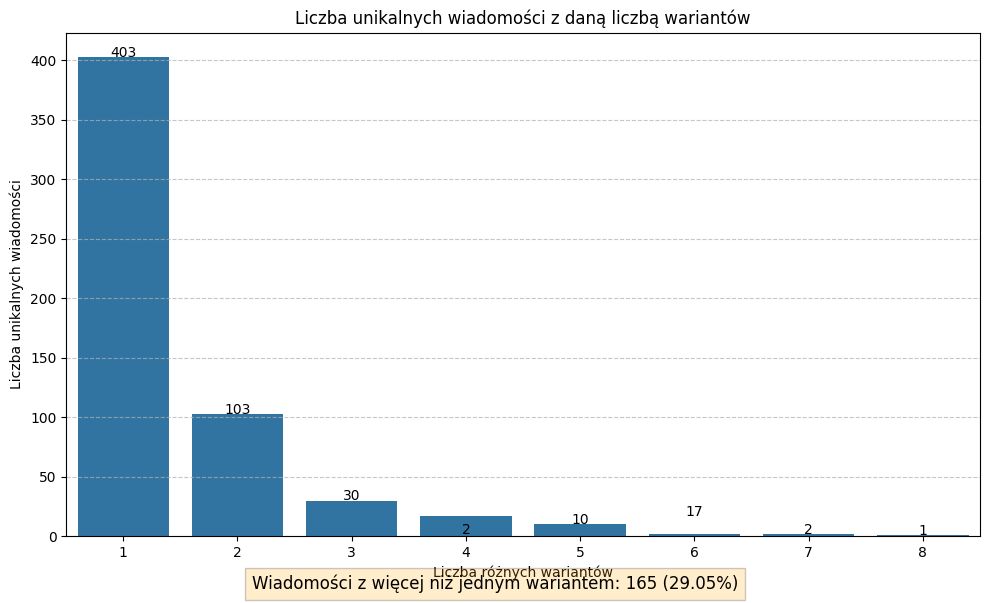

Liczba unikalnych wiadomości: 568
Liczba wiadomości z więcej niż jednym wariantem: 165 (29.05%)
Maksymalna liczba wariantów dla jednej wiadomości: 8


In [16]:
# Sprawdzenie czy duplikaty wiadomości to zawsze duplikaty całego rekordu
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Słownik do przechowywania informacji o wiadomościach i ich wariantach
message_variants = defaultdict(set)

# Dla każdego rekordu w data_found
for d in data_found:
    # Konwersja listy słowników na format, który można użyć jako klucz
    message_tuple = tuple([(m.get('role', ''), m.get('content', '')) for m in d['messages']])
    # Dodanie wariantu do zbioru wariantów dla tej wiadomości
    message_variants[message_tuple].add(d['metadata']['variant_name'])

# Analiza liczby wariantów dla każdej unikalnej wiadomości
variant_counts = [len(variants) for variants in message_variants.values()]

# Tworzenie słownika z liczbą wiadomości dla każdej liczby wariantów
variant_distribution = defaultdict(int)
for count in variant_counts:
    variant_distribution[count] += 1

# Przygotowanie danych do wykresu
x = list(variant_distribution.keys())
y = list(variant_distribution.values())

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y)
plt.title('Liczba unikalnych wiadomości z daną liczbą wariantów')
plt.xlabel('Liczba różnych wariantów')
plt.ylabel('Liczba unikalnych wiadomości')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Dodanie etykiet z wartościami na słupkach
for i, v in enumerate(y):
    plt.text(i, v + 0.1, str(v), ha='center')

# Obliczenie procentu wiadomości z więcej niż jednym wariantem
multi_variant_messages = sum(1 for count in variant_counts if count > 1)
multi_variant_percentage = (multi_variant_messages / len(variant_counts)) * 100

# Dodanie informacji tekstowej na wykresie
plt.figtext(0.5, 0.01, 
            f"Wiadomości z więcej niż jednym wariantem: {multi_variant_messages} ({multi_variant_percentage:.2f}%)",
            ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

plt.tight_layout()
plt.show()

# Wyświetlenie szczegółowych statystyk
print(f"Liczba unikalnych wiadomości: {len(message_variants)}")
print(f"Liczba wiadomości z więcej niż jednym wariantem: {multi_variant_messages} ({multi_variant_percentage:.2f}%)")
print(f"Maksymalna liczba wariantów dla jednej wiadomości: {max(variant_counts)}")


In [24]:
founds = 0
all = 0
for d in data_found:
    response = get_response_with_cache_with_model(d["messages"], model="deepseek-ai/DeepSeek-R1-Distill-Llama-70B-free")
    if d['metadata']['variant_name'] in response.split("\n"):
        founds += 1
    all += 1
    print(f"Current score: {founds/all*100:.2f}%")
founds / len(data_found)

Wykonywanie zapytania do API...


InvalidRequestError: Error code: 422 - {"message": "Input validation error: `inputs` tokens + `max_new_tokens` must be <= 8193. Given: 9939 `inputs` tokens and 4096 `max_new_tokens`", "type_": "invalid_request_error"}

In [17]:
# Funkcja do zapisywania cache do pliku
def save_cache_to_file(cache_obj, filename="prompt_cache.json"):
    """Zapisuje obiekt cache do pliku JSON."""
    import json
    
    try:
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(cache_obj.cache, f, ensure_ascii=False, indent=2)
        print(f"Cache zapisany pomyślnie do pliku {filename}")
        return True
    except Exception as e:
        print(f"Błąd podczas zapisywania cache do pliku: {e}")
        return False

# Funkcja do wczytywania cache z pliku
def load_cache_from_file(cache_obj, filename="prompt_cache.json"):
    """Wczytuje cache z pliku JSON do obiektu cache."""
    import json
    import os
    
    if not os.path.exists(filename):
        print(f"Plik {filename} nie istnieje.")
        return False
    
    try:
        with open(filename, 'r', encoding='utf-8') as f:
            loaded_cache = json.load(f)
        
        # Aktualizacja obiektu cache
        cache_obj.cache = loaded_cache
        print(f"Cache wczytany pomyślnie z pliku {filename}")
        return True
    except Exception as e:
        print(f"Błąd podczas wczytywania cache z pliku: {e}")
        return False

# Przykład użycia - zapisanie aktualnego cache do pliku
save_cache_to_file(prompt_cache)

# Przykład użycia - wczytanie cache z pliku
# load_cache_from_file(prompt_cache)


Cache zapisany pomyślnie do pliku prompt_cache.json


True

In [8]:
data_found[0]['metadata']['variant_name']

'V600E'

In [1]:
# write a code to fine-tune this model via together ai, using 90% of data_found for training and 10% for validation
from sklearn.model_selection import train_test_split

# Przygotowanie danych do fine-tuningu
training_data = []
for d in data_found:
    training_data.append({
        "messages": d["messages"],
        "metadata": d["metadata"]
    })

# Podział na zbiór treningowy i walidacyjny
train_data, val_data = train_test_split(training_data, test_size=0.1, random_state=42)

# Przygotowanie danych w formacie wymaganym przez Together AI
train_messages = []
val_messages = []

for d in train_data:
    train_messages.extend(d["messages"])
    
for d in val_data:
    val_messages.extend(d["messages"])




NameError: name 'data_found' is not defined

In [25]:
# Importowanie biblioteki Together AI
import together
import os
from time import sleep

# Ustawienie klucza API (zakładając, że masz go w zmiennych środowiskowych)
# Jeśli nie, zastąp poniższą linię swoim kluczem API
together.api_key = os.environ.get("TOGETHER_API_KEY")

# Rozpoczęcie fine-tuningu
try:
    # Tworzenie zadania fine-tuningu
    fine_tune_job = together.fine_tuning.create(
        model="meta-llama/Meta-Llama-3.1-8B-Instruct",
        training_data=train_messages,
        validation_data=val_messages,
        hyperparameters={
            "epochs": 3,
            "batch_size": 4,
            "learning_rate": 1e-5
        }
    )
    
    # Wyświetlenie informacji o procesie fine-tuningu
    print(f"Fine-tuning rozpoczęty. ID zadania: {fine_tune_job.id}")
    
    # Monitorowanie statusu fine-tuningu
    while True:
        status = together.fineTune.retrieve(fine_tune_job.id)
        print(f"Status: {status.status}")
        
        if status.status in ["succeeded", "failed", "cancelled"]:
            break
            
        # Sprawdzanie statusu co 5 minut
        sleep(300)
    
    if status.status == "succeeded":
        print(f"Fine-tuning zakończony sukcesem. Model ID: {status.fine_tuned_model}")
        
        # Testowanie modelu po fine-tuningu
        response = together.Completion.create(
            model=status.fine_tuned_model,
            prompt="Zidentyfikuj wariant w sekwencji: TTGACCTAAGTCTGGACCAATTGATTGCTTTTCAATACAACTTTGCAAAGAACTTCCTTT",
            max_tokens=100,
            temperature=0.7
        )
        
        print("Przykładowa odpowiedź modelu po fine-tuningu:")
        print(response.choices[0].text)
    else:
        print(f"Fine-tuning zakończony niepowodzeniem. Status: {status.status}")
        
except Exception as e:
    print(f"Wystąpił błąd podczas fine-tuningu: {e}")



AttributeError: 'Together' object has no attribute 'create_fine_tune'